In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Fraud.csv')

In [3]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [10]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='isFraud'>

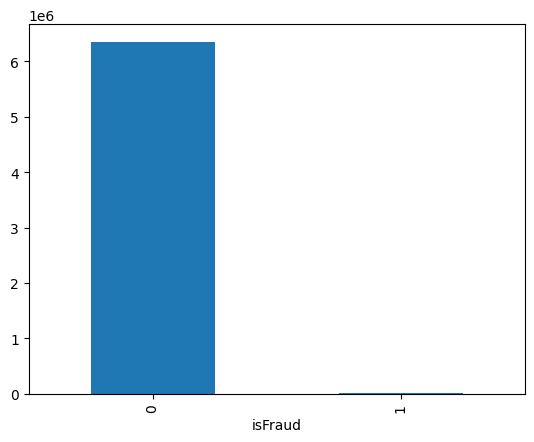

In [21]:
data['isFraud'].value_counts().plot(kind ='bar')

The data is hughly imbalanced, so Tree based algorithms will be good choice.

In [14]:
temp = data[data['nameDest'].str.contains('M')]
temp

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


Correlation Heatmap

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

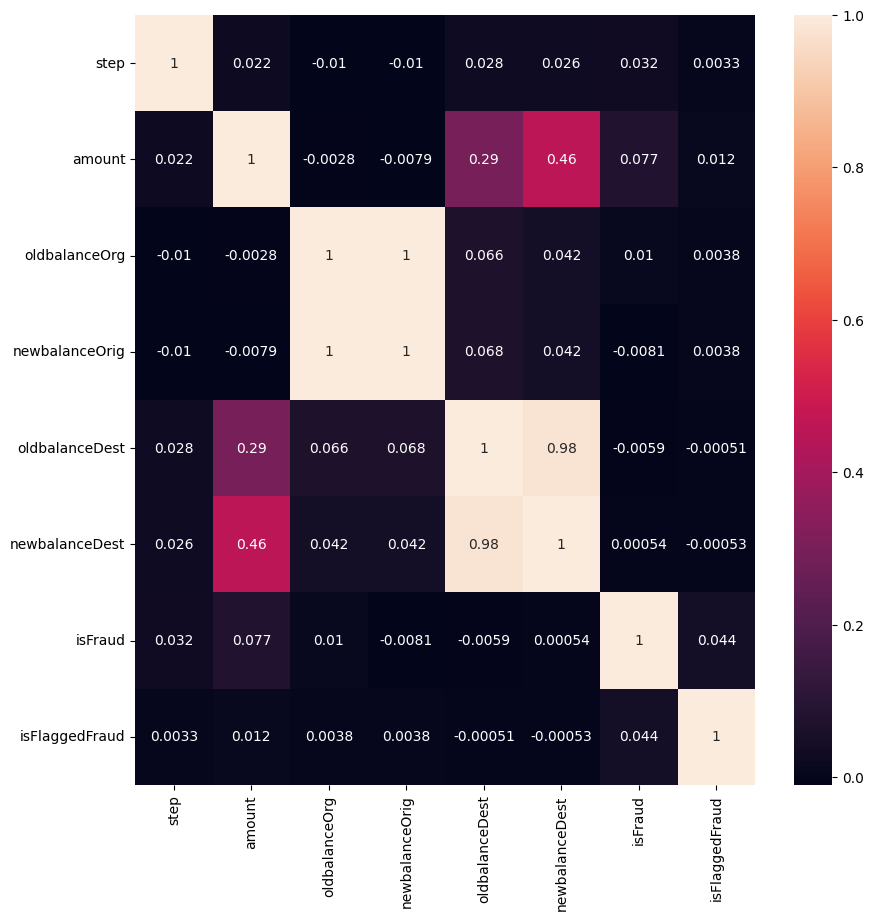

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [50]:
data_copy = data.copy()
data_copy

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [51]:
objList = data_copy.select_dtypes(include='object').columns
objList

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [52]:
# Label encoding objects to numerics conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objList:
    data_copy[feature] = le.fit_transform(data_copy[feature].astype(str))

print (data_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [53]:
data_copy.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


Checking for Multicolinearlity

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):

    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calculate_vif(data_copy)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


oldbalanceOrg and newbalanceOrig ahve high VIF meaning they are correlated, similarly oldbalanceDest and newbalanceDest are also corealated.
Thus combine these pairs of collinear attributes and drop the individual ones.

In [55]:
data_copy['Amount_Orig'] = data_copy.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'], axis = 1)
data_copy['Amount_Dest'] = data_copy.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'] , axis = 1)
data_copy['Path'] = data_copy.apply(lambda x: x['nameOrig'] + x['nameDest'], axis = 1)
## Droping old columns
data_copy = data_copy.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)
calculate_vif(data_copy)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Amount_Orig,1.307910
5,Amount_Dest,3.754335
6,Path,2.677167


<Axes: >

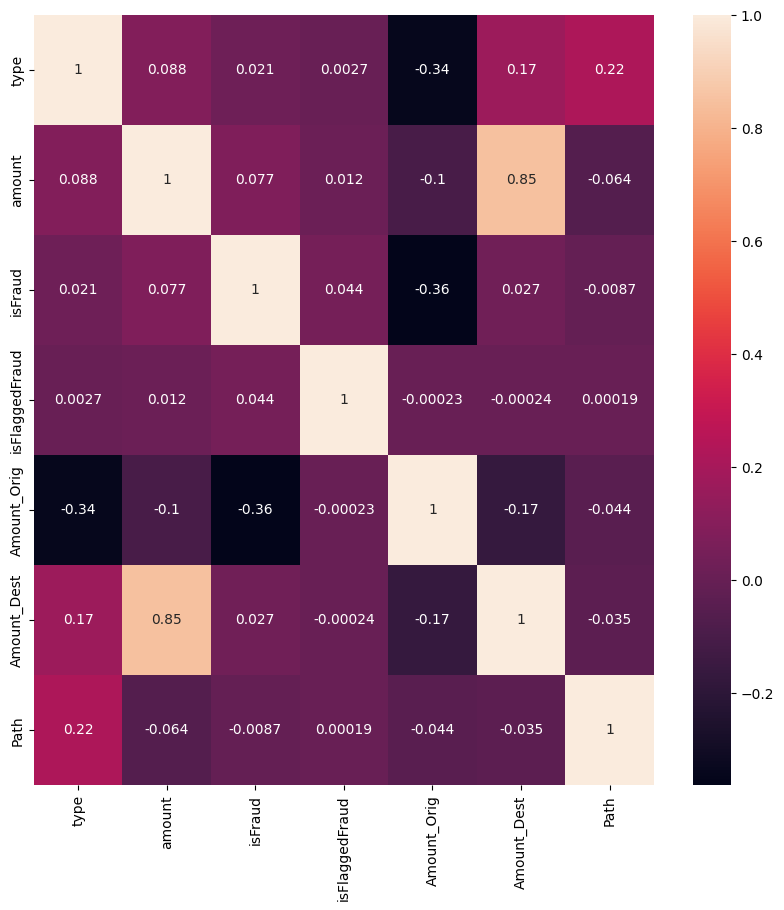

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(data_copy.corr(),annot=True)

In [56]:
data_copy.describe()

,type,amount,isFraud,isFlaggedFraud,Amount_Orig,Amount_Dest,Path
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.714150e+00,1.798619e+05,1.290820e-03,2.514687e-06,-2.123056e+04,-1.242947e+05,3.923105e+06
std,1.350117e+00,6.038582e+05,3.590480e-02,1.585775e-03,1.466433e+05,8.129391e+05,1.981402e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.915268e+06,-1.056878e+08,1.054000e+03
25%,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,-1.491054e+05,2.321760e+06
50%,1.000000e+00,7.487194e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.923117e+06
75%,3.000000e+00,2.087215e+05,0.000000e+00,0.000000e+00,1.015044e+04,0.000000e+00,5.510344e+06
max,4.000000e+00,9.244552e+07,1.000000e+00,1.000000e+00,1.000000e+07,1.306083e+07,9.073607e+06


<Axes: ylabel='Density'>

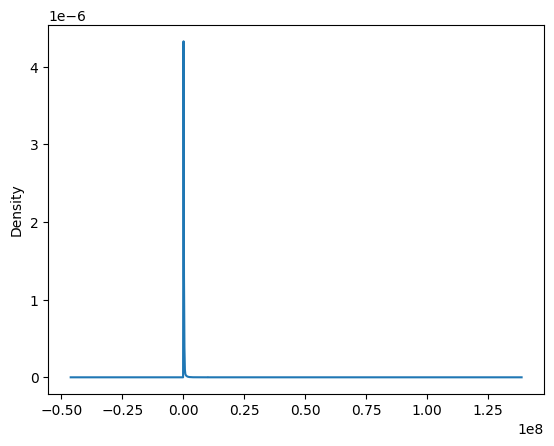

In [57]:
data_copy['amount'].plot.kde()

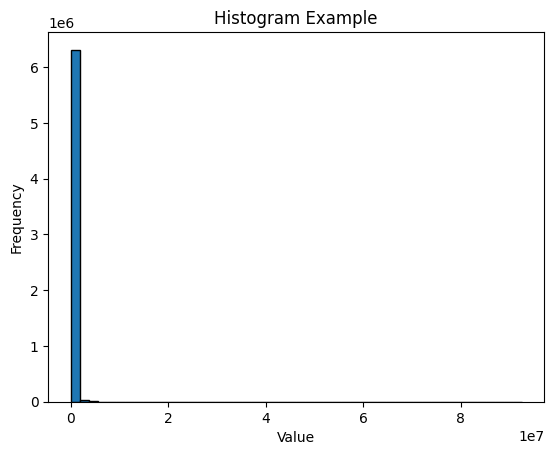

In [58]:
plt.hist(data_copy['amount'],bins=50,edgecolor = 'black')
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

The data is not normaly distributed. So we have to normalize the amount data

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_copy["NormalizedAmount"] = scaler.fit_transform(data_copy["amount"].values.reshape(-1, 1))
data_copy.drop(["amount"], inplace= True, axis= 1)

<Axes: >

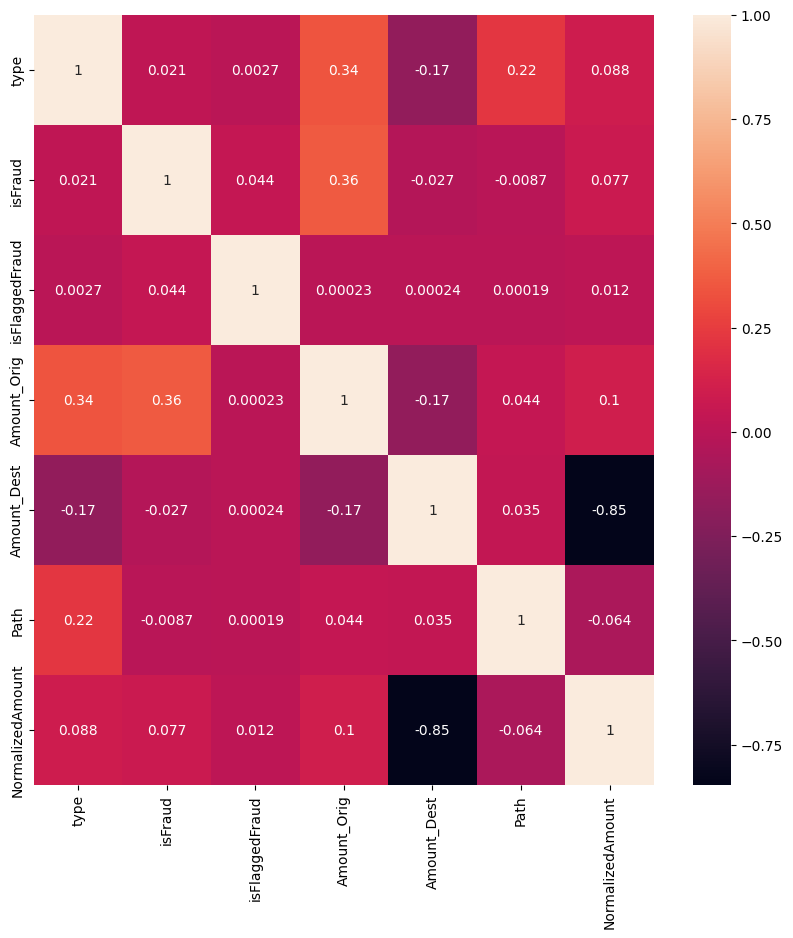

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(data_copy.corr(),annot=True)

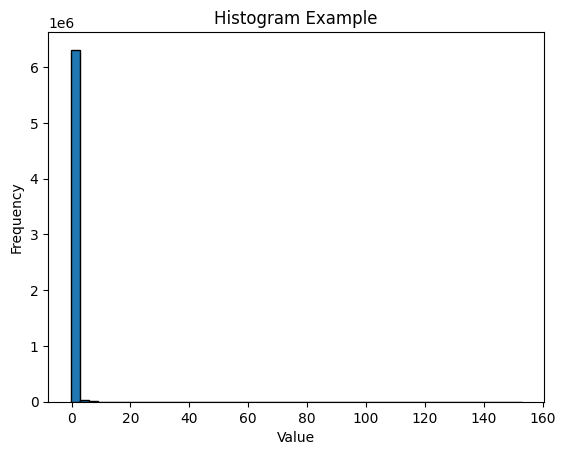

In [61]:
plt.hist(data_copy['NormalizedAmount'],bins=50,edgecolor = 'black')
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Searching for outliers

In [62]:
Q1 = data_copy['NormalizedAmount'].quantile(0.25)
Q3 = data_copy['NormalizedAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_copy[(data_copy['NormalizedAmount'] < lower_bound) | (data_copy['NormalizedAmount'] > upper_bound)]

In [66]:
outlier_fraud = outliers['isFraud'].value_counts()

In [67]:
data_fraud = data['isFraud'].value_counts()

In [76]:
print("Percentage of fraud in outlier data : "  + str((outlier_fraud[1]/data_fraud[1])*100))
print("Outliers as percentage of all transactions : " + str((len(outliers)/len(data))*100))

Percentage of fraud in outlier data : 46.925605746986484
Outliers as percentage of all transactions : 5.313502928039078


The outliers form only 5.31 percet of the total transactions but constiture 46.92 percent of all the fraud transactions. So, the outliers should'nt be removed as it will also remove a significant portion of fraud transactions and the model won't be able to significantly learn patterns.

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pickle as pkl
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [79]:
Y = data_copy["isFraud"]
X = data_copy.drop(["isFraud"], axis= 1)

In [80]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.2, random_state= 42,stratify=Y)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (5090096, 6)
Shape of X_test:  (1272524, 6)


In [83]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
dt_score = dt.score(X_test,Y_test)*100
accuracy_score(Y_test,Y_pred_dt)

0.9992400929176974

In [85]:
adboost = AdaBoostClassifier()
adboost.fit(X_train,Y_train)
Y_pred_adboost = adboost.predict(X_test)
adboost_score = adboost.score(X_test,Y_test)*100
accuracy_score(Y_test,Y_pred_adboost)*100

C:\Users\ANUJ BELGAONKAR\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


99.92943158635907

In [88]:
rf = RandomForestClassifier(n_estimators= 100)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
rf_score = rf.score(X_test, Y_test) * 100
accuracy_score(Y_test,Y_pred_rf)*100

99.95952925052887

In [89]:
print("Decision Tree Score: ", dt_score)
print("Random Forest Score: ", rf_score)
print("AdaBoost Score: ", adboost_score)

Decision Tree Score:  99.92400929176975
Random Forest Score:  99.95952925052887
AdaBoost Score:  99.92943158635907


In [90]:
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt)
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

print("----------------------------------------------------------------------------------------")

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

print("----------------------------------------------------------------------------------------")

confusion_matrix_adboost = confusion_matrix(Y_test, Y_pred_adboost)
print("Confusion Matrix - Adaboost")
print(confusion_matrix_adboost)

Confusion Matrix - Decision Tree
[[1270401     503]
 [    464    1156]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1270858      46]
 [    469    1151]]
----------------------------------------------------------------------------------------
Confusion Matrix - Adaboost
[[1270813      91]
 [    807     813]]


In [96]:
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

print("----------------------------------------------------------------------------------------")

classification_report_adboost = classification_report(Y_test, Y_pred_adboost)
print("Classification Report - Adaboost")
print(classification_report_adboost)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.70      0.71      0.71      1620

    accuracy                           1.00   1272524
   macro avg       0.85      0.86      0.85   1272524
weighted avg       1.00      1.00      1.00   1272524

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.71      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.86      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524

----------------------------------------------------------------------------------------
Classification Report - Adaboost
              precision    recall  f1-score   support

    

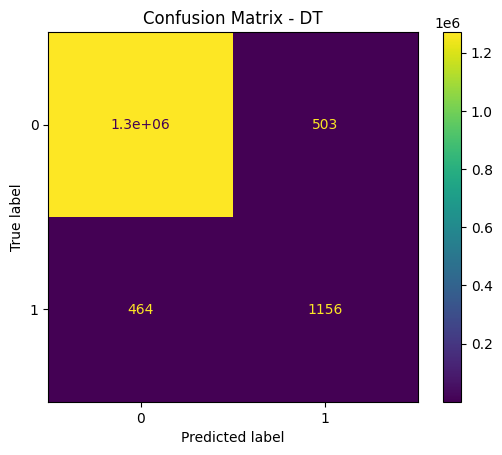

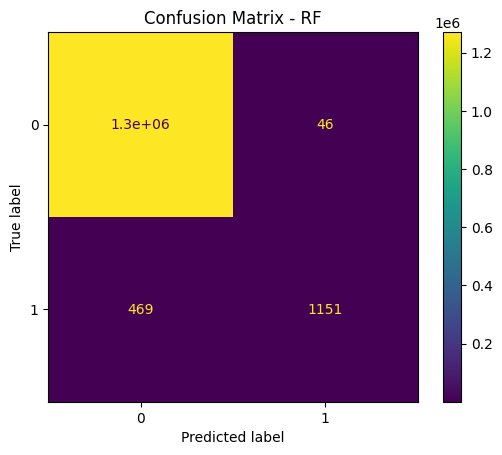

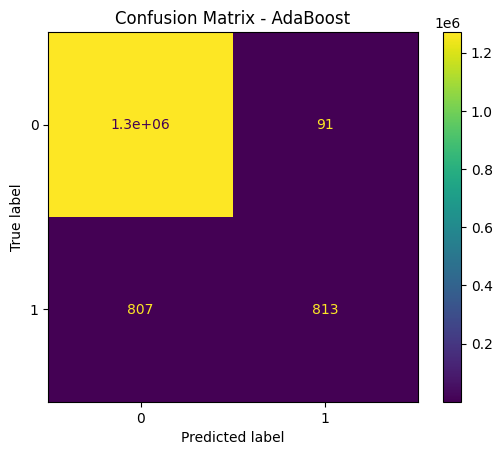

In [92]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_adboost)
disp.plot()
plt.title('Confusion Matrix - AdaBoost')
plt.show()

In [95]:
pkl.dump(rf, open('rf.pkl', 'wb'))

## Conclusion

We have seen that Accuracy of both Decision Tree is more than Random forest, although the precision of Random Forest is more.In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.

Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.

Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values. As we have seen with Adaboost

What are the key factors that predict fraudulent customer?

1) The source of request is secured or not ?
2) Is the name of organisation asking for money is legit or not ?
3) Transaction history of vendors.

What kind of prevention should be adopted while company update its infrastructure?

1) Use smart vertified apps only.
2) Browse through secured websites.
3) Use secured internet connections (USE VPN).
4) Keep your mobile and laptop security updated.
5) Don't respond to unsolicited calls/SMS/E-mails.
6) If you feel like you have been tricked or security compromised, contact your bank immidiately.

Assuming these actions have been implemented, how would you determine if they work?

1) Bank sending E-statements.
2) Customers keeping a check of their account activity.
3) Always keep a log of your payments.